# Azure AI Foundry project informations

In [1]:
import datetime
import pandas as pd
import sys

from azure.ai.projects import AIProjectClient
from azure.identity import DefaultAzureCredential
from dotenv import load_dotenv

In [2]:
sys.version

'3.10.14 (main, May  6 2024, 19:42:50) [GCC 11.2.0]'

In [3]:
print(f"Today is {datetime.datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 26-Jun-2025 12:22:55


## Project client

In [4]:
load_dotenv("azure.env")

azure_foundry_project = os.getenv("azure_foundry_project")

In [5]:
project_client = AIProjectClient(
    credential=DefaultAzureCredential(),
    endpoint=azure_foundry_project,
)

## Project deployed models and connections

In [6]:
deploy_list = []

for deployment in project_client.deployments.list():
    deploy_list.append({
        "name":
        deployment["name"],
        "model":
        deployment["modelName"],
        "version":
        deployment["modelVersion"],
        "publisher":
        deployment["modelPublisher"],
        "capabilities":
        ", ".join(deployment["capabilities"].keys()),
        "sku":
        deployment["sku"]["name"],
        "capacity":
        deployment["sku"]["capacity"],
    })

df = pd.DataFrame(deploy_list)
df

,name,model,version,publisher,capabilities,sku,capacity
0,o4-mini,o4-mini,2025-04-16,OpenAI,chat_completion,GlobalStandard,850
1,gpt-4.1,gpt-4.1,2025-04-14,OpenAI,chat_completion,GlobalStandard,850
2,gpt-4o,gpt-4o,2024-11-20,OpenAI,chat_completion,Standard,150
3,gpt-4o-mini,gpt-4o-mini,2024-07-18,OpenAI,chat_completion,Standard,450
4,model-router,model-router,2025-05-19,OpenAI,chat_completion,GlobalStandard,130
5,o3,o3,2025-04-16,OpenAI,chat_completion,GlobalStandard,150
6,DeepSeek-R1-0528,DeepSeek-R1-0528,1,DeepSeek,chat_completion,GlobalStandard,1
7,grok-3,grok-3,1,xAI,chat_completion,GlobalStandard,1
8,text-embedding-3-large,text-embedding-3-large,1,OpenAI,embeddings,GlobalStandard,150
9,text-embedding-ada-002,text-embedding-ada-002,2,OpenAI,embeddings,GlobalStandard,150


<Axes: ylabel='publisher'>

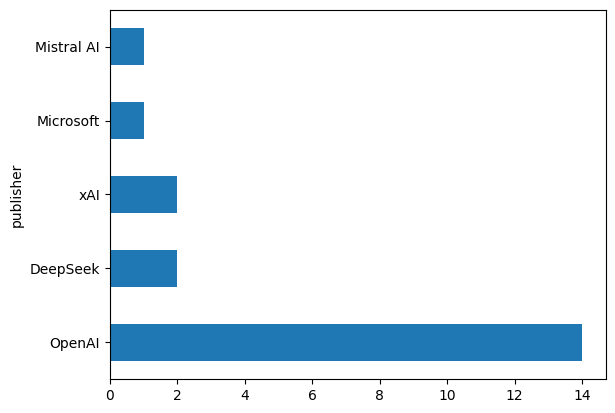

In [7]:
df['publisher'].value_counts(sort=True).plot.barh()

<Axes: ylabel='capabilities'>

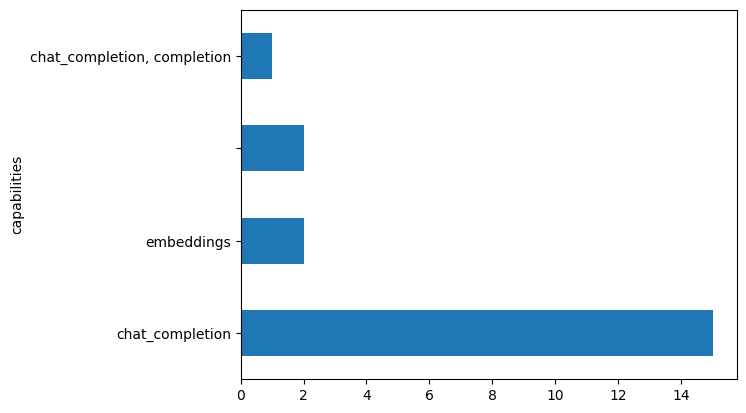

In [8]:
df['capabilities'].value_counts(sort=True).plot.barh()

<Axes: ylabel='sku'>

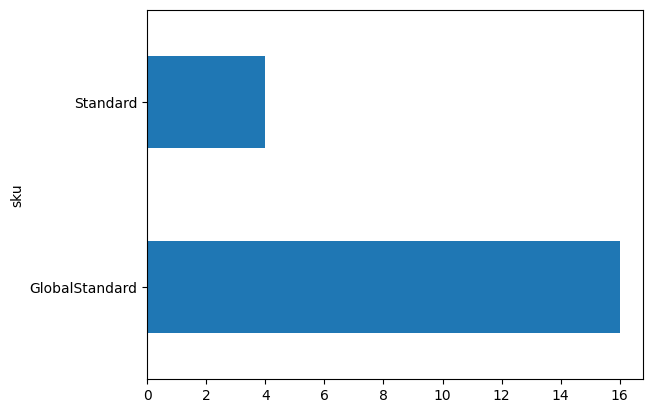

In [9]:
df['sku'].value_counts(sort=True).plot.barh()

In [10]:
model_publisher = "DeepSeek"

for deployment in project_client.deployments.list(
        model_publisher=model_publisher):
    print(deployment)
    print()

{'name': 'DeepSeek-R1-0528', 'type': 'ModelDeployment', 'modelName': 'DeepSeek-R1-0528', 'modelVersion': '1', 'modelPublisher': 'DeepSeek', 'capabilities': {'chat_completion': 'true'}, 'sku': {'name': 'GlobalStandard', 'capacity': 1}}

{'name': 'DeepSeek-V3-0324', 'type': 'ModelDeployment', 'modelName': 'DeepSeek-V3-0324', 'modelVersion': '1', 'modelPublisher': 'DeepSeek', 'capabilities': {'chat_completion': 'true'}, 'sku': {'name': 'GlobalStandard', 'capacity': 1}}



In [11]:
model_name = "o4-mini"

for deployment in project_client.deployments.list(model_name=model_name):
    print(deployment)

{'name': 'o4-mini', 'type': 'ModelDeployment', 'modelName': 'o4-mini', 'modelVersion': '2025-04-16', 'modelPublisher': 'OpenAI', 'capabilities': {'chat_completion': 'true'}, 'sku': {'name': 'GlobalStandard', 'capacity': 850}}


In [12]:
model_deployment_name = "gpt-4o"

deployment = project_client.deployments.get(model_deployment_name)
print(deployment)

{'name': 'gpt-4o', 'type': 'ModelDeployment', 'modelName': 'gpt-4o', 'modelVersion': '2024-11-20', 'modelPublisher': 'OpenAI', 'capabilities': {'chat_completion': 'true'}, 'sku': {'name': 'Standard', 'capacity': 150}}


In [13]:
print("List all connections:\n")

for connection in project_client.connections.list():
    print(f"{connection.name:70} {connection.type}")

List all connections:

ai-seretkow-6903                                                       AIServices
seret-mbkyml90-australiaeast                                           AIServices
seret-mbkypzmj-uaenorth                                                AIServices
azureopenaieastustwosr                                                 AzureOpenAI
seret-ma25ys8m-westus3                                                 AIServices
fs2fmrsxo3hekv6                                                        AzureStorageAccount
azurestorageaccountsr                                                  AzureStorageAccount
hrweb                                                                  CustomKeys
azureaisearchsr                                                        CognitiveSearch
LogicApps_Tool_Connection_Sendemailoutlook_5358                        CustomKeys
azureopenaicanadaeastsr                                                AzureOpenAI
bingsearchservice                                 